---
# Introduction à l'apprentissage automatique
---

<center><img src="./img/mlprocess_3.png" alt="Processus d'apprentissage automatique" width="50%"/></center>

# Exemple 1 : Composantes d'un algorithme

Dans cet exercice, l'objectif est de définir et comprendre le vocabulaire utilisé en apprentissage automatique et ce qu'il représente. Nous allons voir l'ensemble des données (_data set_), la fonction de perte (_loss function_), la différence entre le vrai risque et le risque empirique, la régularisation, la fonction objectif (_objective function_).


Import des librairies nécessaires


In [1]:
%matplotlib inline
# %matplotlib notebook # Pour la manipulation des images 3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Choix de la fonction à apprendre pour l'exemple : ici un polynôme de degré 5.

In [2]:
listeParamPoly = [0.03, 0.2, -1, -10, 100]

In [3]:
def generate_data(N):
    x = np.random.uniform(-10,10,N)
    y = np.polyval(listeParamPoly,x) + np.random.normal(0.0, 15.0, N)
    return x.reshape(-1, 1), y

Génération des données : Choisir le nombre de points à utiliser :

In [4]:
dataPoints = 20

In [5]:
X,y = generate_data(dataPoints)

## Visualisation des données 

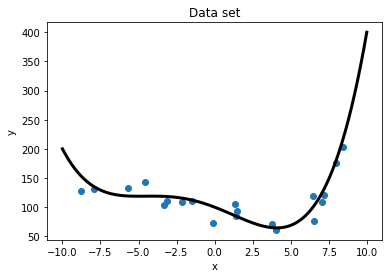

In [6]:
fig, ax = plt.subplots()
# Affichage des points
ax.plot(X, y, 'o')
# Affichage de la fonction échantillonnée
ax.plot(np.linspace(-10,10,100), np.polyval(listeParamPoly,np.linspace(-10,10,100)), color='black', linewidth=3)
# Axes & titre
ax.set_title('Data set')
ax.set_ylabel('y')
ax.set_xlabel('x')
plt.show()

## Définition de la fonction de perte

Choisir une fonction de perte parmi les trois données dans la présentation ... ou une autre au choix.

$$\mathcal{L}(\hat{y},y) = |\hat{y}-y|^2$$

In [7]:
L = lambda y1, y2: np.abs(y1-y2)**2

Vous remarquerez que vous pouvez simplement passer de la perte quadratique à la perte absolue en enlevant le `**2` à la fin de la fonction et en rééxécutant la cellule.

## Définition du modèle prédictif 

On prend une régression linéaire pour l'exemple. Si vous souhaitez changer ça pour un autre modèle c'est ici : 
$$\hat{y} = \theta_0\cdot x + \theta_1$$

Si on souhaitait prendre un modèle quadratique, on utiliserait : 
$$\hat{y} = \theta_0\cdot x^2 + \theta_1\cdot x + \theta_2$$

N'hésitez pas à changer le code suivant, une fois rendu à la fin de l'exercice; vous pourriez apprendre encore plus! ;-)

Seul souci à prévoir : vous ne pourrez plus faire la visualisation 3D plus bas, car on aurait besoin de faire une visualisation en 4 dimensions.


In [8]:
def h(x, theta):
    y = theta[0]*x + theta[1]
    return y

## La fonction de risque empirique

Le risque empirique est calculé à partir de la fonction de perte et du modèle choisis sur les données réelles.

Ici, nous avons choisi de prendre la moyenne des erreurs $\mathcal{L}(\hat{y},y)$ (MAE, MSE, ...) mais d'autres formes existent avec le $\min$ ou le $\max$.


In [9]:
def risque_empirique(L,y,X,theta):
    loss = 0
    for i in range(0,np.max(y.shape)):
        y_hat = h(X[i], theta)
        loss = loss + L(y[i], y_hat)
    return loss/float(np.max(y.shape))

## Définition d'une fonction de régularisation

Ici une régularisation $L_1$ est choisie. Vous pouvez en prendre une autre (la $L_2$ par exemple).

In [10]:
def regularisation(theta):
    return np.sum(np.abs(theta)) #L1
#    return ??? #L2

## La fonction objectif

C'est la somme (pondérée) du risque empirique et de la régularisation.

In [11]:
def objective(L,y,X,r,theta):
    return risque_empirique(L,y,X,theta) + r*regularisation(theta)

## Calcul exhaustif de la fonction objectif (généralement intractable)

On calcule la fonction objectif pour tous les paramètres possibles. Avec deux ou trois paramètres c'est encore possible ... mais ce n'est visualisable qu'à deux.


In [12]:
M = 25
linspace_A = np.linspace(-200, 200, M)
linspace_b = np.linspace(-200, 200, M)
R = np.zeros((M, M))
r = 0.1
for i in range(0,M):
    for j in range(0,M):
        theta = np.array([linspace_A[i], linspace_b[j]])
        R[i,j] = np.log(objective(L,y,X,r,theta)) 

## Visualisation de la fonction objectif

Une fonction objectif à deux paramètres peut être visualisée, mais pas au-delà.  


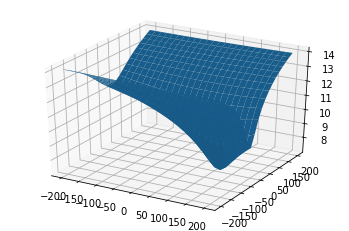

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
mesh_A, mesh_b = np.meshgrid(linspace_A, linspace_b)
ax.plot_surface(mesh_A, mesh_b, R)
plt.show()

## Optimisation avec SciPy

On n'ouvrira pas dans la boîte de Pandore de l'optimisation lors de cette formation. Nous allons plutôt utiliser un des outils de SciPy, la méthode [`nelder-mead`](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method).


In [14]:
from scipy.optimize import minimize

In [15]:
r = 0.1
theta0 = np.array([0.0, 0.0])
f = lambda theta: objective(L,y,X,r,theta)
es = minimize(f, theta0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
theta_opt = es.x

Optimization terminated successfully.
         Current function value: 1139.336191
         Iterations: 125
         Function evaluations: 253


In [16]:
print('Les paramètres estimés sont :')
print('A = %2.4f, b = %2.4f' % (theta_opt[0], theta_opt[1]))

Les paramètres estimés sont :
A = 0.3080, b = 112.6976


## Visualisation du modèle appris

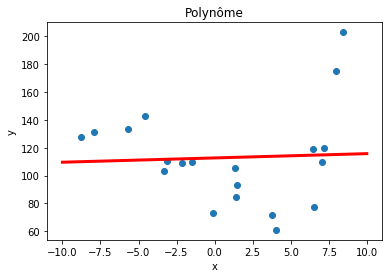

In [17]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o')
ax.set_title('Polynôme')
ax.set_ylabel('y')
ax.set_xlabel('x')

linspace_x = np.linspace(-10, 10, num=100)
A = theta_opt[0]
b = theta_opt[1]
h_x = h(linspace_x,theta_opt)
ax.plot(linspace_x, h_x, color='red', linewidth=3)

plt.show()

## Calcul du "vrai" risque

Encore une fois, c'est rarement possible de pouvoir le faire. Il faudrait avoir accès à la distribution réelle des données avec laquelle on interroge notre modèle afin d'avoir une bonne estimation du risque. 


In [18]:
X_test, y_test = generate_data(1000000)
vrai_risque = risque_empirique(L,y_test,X_test,theta_opt)
print('Le vrai risque du modèle appris est : %5.2f' % vrai_risque[0])

Le vrai risque du modèle appris est : 4135.24


# Exemple 2 : Augmentation de la capacité d'un modèle

## Définition des fonctions de caractéristiques

Ajoutez dans le vecteur $\varphi$ autant de fonctions de caractéristiques que vous le souhaitez (idéalement non-linéaires).

In [19]:
phi_names = [
       "x: x**0", 
       #"x: x**1",
       #...d'autres ?
       #"x: np.abs(x)",
       #"x: x > 0.0",
       #...au choix ?
       #"x: np.cos(x)",
       #"x: np.sin(0.1*x)"
       #...ou encore ?
      ]

phi = [
       lambda x: x**0, #...en haut c'était juste les noms pour l'affichage ... il faut les coder maintenant !
      ]

On va utiliser ce vecteur pour faire la projection des données dans l'espace des caractéristiques. Voici la fonction de projection:

In [20]:
def feature_space_projection(X, phi):
    X_features = []
    for i in range(0, len(phi)):
        X_features.append(np.apply_along_axis(phi[i], 0, X))
    X_augmented = np.concatenate(X_features, axis=1)
    return X_augmented

## Calcul de la projection dans l'espace des caractéristiques

Calcul de la projection puis affichage de notre entrée dans le nouvel espace.

In [21]:
X_augmented = feature_space_projection(X, phi)

In [22]:
X_augmented[0,:]

array([1.])

## Entraînement du modèle

Maintenant que nous avons plus de fonctions de caractéristiques dans notre boîte à outils, on va utiliser le modèle de régression linéaire [`linear_model.LinearRegression()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) de Scikit-Learn. On pourrait également utiliser d'autres modèles [linéaires](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).


In [23]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_augmented, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Calcul de l'erreur sur l'ensemble d'entraînement vs le "vrai" risque

In [24]:
from sklearn.metrics import mean_squared_error

### Erreur d'entraînement

Calcul de la fonction de perte [MSE](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) sur les données d'entraînement:

In [25]:
y_pred = reg.predict(X_augmented)
training_error = mean_squared_error(y, y_pred)
print("L'erreur d'entraînement du modèle appris est : %5.2f" % training_error)

L'erreur d'entraînement du modèle appris est : 1130.70


### Estimation du vrai risque

Et si on valide (non réalistiquement) sur la *vraie* distribution des données:

In [26]:
X_test,y_test = generate_data(10000000)
X_test_augmented = feature_space_projection(X_test, phi)
y_test_pred = reg.predict(X_test_augmented)
test_error = mean_squared_error(y_test, y_test_pred)
print("Vrai risque du modèle appris est : %5.2f" % test_error)

Vrai risque du modèle appris est : 4176.69


## Attention au surapprentissage

Lorsque le nombre de caractéristiques utilisé est très important, la capacité du modèle augmente énormément. Le modèle finit par apprendre *par coeur* les données.


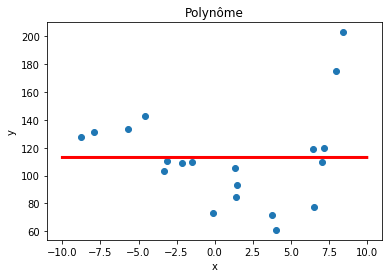

In [27]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o')
ax.set_title('Polynôme')
ax.set_ylabel('y')
ax.set_xlabel('x')

linspace_x = np.linspace(-10, 10, num=100000)
linspace_x = np.expand_dims(linspace_x, axis=1)

linspace_X_augmented = feature_space_projection(linspace_x, phi)

y_pred = reg.predict(linspace_X_augmented)
ax.plot(linspace_x, y_pred, color='red', linewidth=3)

plt.show()

## Régularisation et hyperparamètres

Il nous faut alors soit réduire le nombres de caractéristiques (et donc la dimensionnalité de l'espace de projection), soit *régulariser* nos paramètres pour assurer une bonne *généralisation*.

On va utiliser ici [ElasticNet](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) de `scikit-learn` qui permet de combiner les normes $L_1$ et $L_2$ pour la régularisation.

Vous pouvez chosir ici le taux de régularisation et la proportion de régularisation $L_1$ vs $L_2$.

In [28]:
taux_de_regularisation = 1.0
ratio_normes = 0.5

On définit ensuite le modèle et on l'entraîne.

In [29]:
reg2 = linear_model.ElasticNet(alpha=taux_de_regularisation, copy_X=True, fit_intercept=True, l1_ratio=ratio_normes,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False)
reg2.fit(X_augmented, y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='random', tol=0.0001, warm_start=False)

Calcul du risque empirique : 

In [30]:
y_pred = reg2.predict(X_augmented)
training_error = mean_squared_error(y, y_pred)
print("L'erreur d'entraînement du modèle appris est : %5.2f" % training_error)

L'erreur d'entraînement du modèle appris est : 1130.70


Calcul du *vrai* risque:

In [31]:
X_test,y_test = generate_data(10000)
X_test_augmented = feature_space_projection(X_test, phi)
y_test_pred = reg2.predict(X_test_augmented)
test_error = mean_squared_error(y_test, y_test_pred)
print("Vrai risque du modèle appris est : %5.2f" % test_error)

Vrai risque du modèle appris est : 4364.11


Affichage du modèle régularisé :

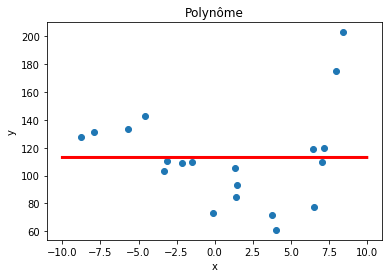

In [32]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o')
ax.set_title('Polynôme')
ax.set_ylabel('y')
ax.set_xlabel('x')

linspace_x = np.linspace(-10, 10, num=10000)
linspace_x = np.expand_dims(linspace_x, axis=1)

linspace_X_augmented = feature_space_projection(linspace_x, phi)

y_pred = reg2.predict(linspace_X_augmented)
ax.plot(linspace_x, y_pred, color='red', linewidth=3)

plt.show()

Valeurs des paramètres de régularisation choisis par ElasticNet:

**Note :** Si vous avez des erreurs ici, assurez vous avant toute chose que le nombre de noms définis dans le dictionnaire `phi_names` est le même que le nombre de fonctions définies dans le dictionnaire `phi`.

In [33]:
import pandas as pd

print('\''+pd.DataFrame({'names':phi_names,'coefs':reg2.coef_}).to_string(index=False)[1:])

'  names  coefs
 x: x**0    0.0


**Pouvez-vous identifier quels sont les fonctions de caractéristiques inutiles ?**

Si vous ne comprenez pas comment ou pourquoi, n'hésitez pas à venir en discuter dans le forum !

# Exemple 3 : Méthodologie de validation et de test

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

In [35]:
def confidence_interval(y, y_pred):
    n = len(y)
    s = np.sqrt(np.var(mean_squared_error(np.expand_dims(y,1).transpose(), np.expand_dims(y_pred,1).transpose(),
                          multioutput='raw_values'), ddof=1))
    return 1.96*s/np.sqrt(n)

Nouvelle génération des données utilisant cette fois-ci plus de points. Le but étant d'obtenir de bons intervalles de confiance. Choisir le nombre de points à utiliser :

In [36]:
dataPoints = 200

In [37]:
X,y = generate_data(dataPoints)

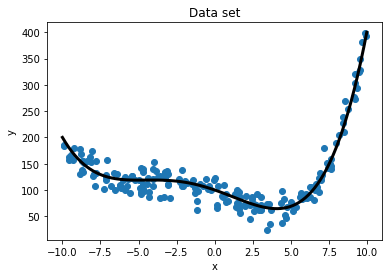

In [38]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o')
ax.plot(np.linspace(-10,10,100), np.polyval(listeParamPoly,np.linspace(-10,10,100)), color='black', linewidth=3)
ax.set_title('Data set')
ax.set_ylabel('y')
ax.set_xlabel('x')
plt.show()

## Définition des fonctions de caractéristiques

Reprenez ici vos fonctions de caractéristiques de l'exercice précédent.

In [39]:
# Choisissez celles qui vous semblent les plus pertinentes :-)
phi = [
    lambda x: x**0, #...Celle ci est pas très utile il me semble ...
    #...
]

## Préparation des données de test

Après projection dans l'espace des caractéristiques, nous découpons notre dataset en trois parties.

In [40]:
X_phi = feature_space_projection(X, phi)

### splits : train(50%) - validation(25%) - test(25%)

Un ensemble d'entrainement (_train_) va nous permettre d'évaluer nos modèles, un ensemble de _validation_ va nous permettre d'évaluer ceux-ci et de choisir le meilleur sur un ensemble de données jamais vu, et un ensemble de _test_ va fournir l'évaluation finale en mode **réel**.

Les ensembles _validation_ et _test_ sont identiques (sous l'hypothèse [IID](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)) et peuvent être permutés sans problème pour la méthodologie (mais au début seulement, après il est interdit d'utiliser l'ensemble _test_ avant la fin).


In [41]:
X_, X_test, y_, y_test = train_test_split(X_phi, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_, test_size=0.33)

### Entraînement du modèle sur les données d'entraînement

Vous pouvez ici changer les hyperparamètres pour en voir l'effet sur les différentes erreurs et sous-ensembles de données. Vous pouvez aussi essayer d'autres [modèles linéaires](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) (mais juste des régresseurs hein !).


In [42]:
reg2 = linear_model.ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=100000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False)
reg2.fit(X_train, y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=100000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='random', tol=0.0001, warm_start=False)

### Évaluation du modèle sur l'ensemble d'entraînement (training loss, erreur d'entrainement)

In [43]:
y_train_pred = reg2.predict(X_train)
training_error = mean_squared_error(y_train, y_train_pred)
print("L'erreur d'entraînement du modèle appris est : %5.2f" % training_error)

L'erreur d'entraînement du modèle appris est : 4658.74


### Évaluation du modèle sur l'ensemble de validation (validation loss, erreur de validation)

In [44]:
y_val_pred = reg2.predict(X_validation)
validation_error = mean_squared_error(y_validation, y_val_pred)
print("L'erreur de validation du modèle appris est : %5.2f" % validation_error)

L'erreur de validation du modèle appris est : 1967.01


### Évaluation du modèle sur l'ensemble de test (test loss, erreur de test)

In [45]:
y_test_pred = reg2.predict(X_test)
test_error = mean_squared_error(y_test, y_test_pred)
print("L'erreur de test du modèle appris est : %5.2f" % test_error)

L'erreur de test du modèle appris est : 5272.25


### Estimation du vrai risque du modèle

In [46]:
X_risk, y_risk = generate_data(1000000)
X_risk = feature_space_projection(X_risk, phi)
y_risk_pred = reg2.predict(X_risk)
true_risk = mean_squared_error(y_risk, y_risk_pred)
print("L'erreur de généralisation du modèle appris est : %5.2f ± %2.2f" % (true_risk, confidence_interval(y_risk, y_risk_pred)))

L'erreur de généralisation du modèle appris est : 4007.70 ± 19.11


Si on se rappelle que les ensembles de test et de validation sont statistiquement identiques, on conçoit aisément que l'estimation du vrai risque est toujours très difficile et potentiellement éloignée des erreurs de validation et de test. 

On a *optimisé* plusieurs modèles sur l'ensemble d'entraînement, on a *choisi* les hyperparamètres d'apprentissage optimaux sur l'ensemble de validation et on a vérifié nos choix **une seule fois** sur l'ensemble de test. 


# Exemple 4 : Méthodologie de validation croisée et test

Dans l'exercice précédent, nous avions un seul ensemble de _validation_. Nos hyperparamètres d'apprentissage étaient optimaux pour cet ensemble et pouvaient mal généraliser. La validation croisée vient pallier ce problème en optimisant les hyperparamètres sur plusieurs ensembles de validation **différents** pour plusieurs ensembles d'entraînement **différents**.

Pour ce faire, nous découpons seulement un ensemble de test pour calculer notre erreur empirique

### splits : train(75%) - test(25%)

soit un ensemble d'entraînement sur lequel nous ferons de la validation croisée et un ensemble de test pour la vérification *finale*.


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_phi, y, test_size=0.25)

## Cross-validation du modèle/hyperparamètres

Vous pouvez ici changer les hyperparamètres pour en voir l'effet sur les différentes erreurs et sous-ensembles de données. Vous pouvez aussi essayer d'autres modèles linéaires.


In [48]:
reg2 = linear_model.ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=100000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False)

In [49]:
cv_score = cross_val_score(reg2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [50]:
-cv_score

array([2693.31951043, 5042.80985131, 5120.70843218, 1810.84503454,
        590.92842989])

In [51]:
np.mean(-cv_score)

3051.7222516695047

## Recherche en grille des hyperparamètres

Plutôt que de rechercher *au hasard* les hyperparamètres, il est plus intéressant, quand c'est possible, de *tous* les essayer.

In [52]:
reg2 = linear_model.ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False)

Définissons ici tous les couples d'hyperparamètres à utiliser.

In [53]:
hyperparameters = {'l1_ratio':[0.0, 0.25, 0.5, 0.75, 1.0], 'alpha':[0.01, 0.1, 1, 10, 100]}

In [54]:
clf = GridSearchCV(reg2, hyperparameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

In [55]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    5.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000000,
                                  normalize=False, positive=False,
                                  precompute=False, random_state=None,
                                  selection='random', tol=0.0001,
                                  warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [56]:
clf.best_params_

{'alpha': 0.01, 'l1_ratio': 0.0}

Curieusement, quand on voit les résultats des *meilleurs* hyperparamètres, l'envie de raffiner votre grille de recherche dans la bonne région se fait probablement sentir ...


## Entraînement et évaluation sur le test

Une fois les meilleurs hyperparamètres choisis, on les utilise pour apprendre sur l'ensemble des données d'entraînement et vérifier une dernière fois notre apprentissage sur l'ensemble de test.


In [57]:
best_alpha = clf.best_params_['alpha']
best_l1ratio = clf.best_params_['l1_ratio']

In [58]:
reg2 = linear_model.ElasticNet(alpha=best_alpha, copy_X=True, fit_intercept=True, l1_ratio=best_l1ratio,
      max_iter=100000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False)
reg2.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.0,
           max_iter=100000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='random', tol=0.0001, warm_start=False)

In [59]:
y_train_pred = reg2.predict(X_train)
training_error = mean_squared_error(y_train, y_train_pred)
print("L'erreur d'entraînement du modèle appris est : %5.2f" % training_error)

L'erreur d'entraînement du modèle appris est : 3043.42


In [60]:
y_test_pred = reg2.predict(X_test)
test_error = mean_squared_error(y_test, y_test_pred)
print("L'erreur de test du modèle appris est : %5.2f ± %2.2f" % (test_error, confidence_interval(y_test, y_test_pred)))

L'erreur de test du modèle appris est : 7347.01 ± 4863.27


On voit ici que l'intervalle de confiance se situe autour de $\pm 30\%$, ce qui veut dire que le *vrai* risque est probablement assez éloigné du risque obtenu.

Affichage du modèle appris :


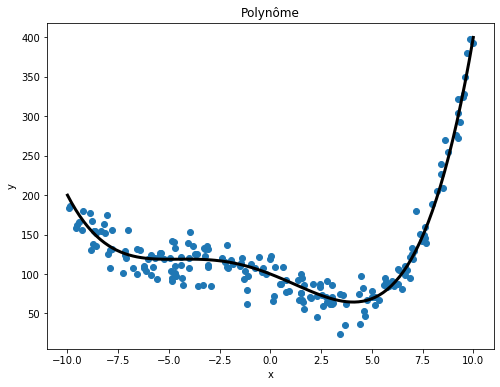

In [61]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X, y, 'o')
ax.plot(np.linspace(-10,10,100), np.polyval(listeParamPoly,np.linspace(-10,10,100)), color='black', linewidth=3)
ax.set_title('Polynôme')
ax.set_ylabel('y')
ax.set_xlabel('x')

linspace_x = np.linspace(-10, 10, num=100000)
linspace_x = np.expand_dims(linspace_x, axis=1)

linspace_X_augmented = feature_space_projection(linspace_x, phi)

y_pred = reg2.predict(linspace_X_augmented)
#ax.plot(linspace_x, y_pred, color='red', linewidth=3)

plt.show()